In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
proj = '48Ca'
trg = '159Tb'
cn = '207At'
bf = 0.82
ch = 'xn'
sigr = 3.2
bf_diff = 0.01

df10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

bf_low_10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf-bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
bf_high_10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf+bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

bf_low_0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf-bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
bf_high_0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf+bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df10_mb

,E_lab,E*/MeV,198At,199At,200At,201At,202At,203At,204At,205At,206At,207At
0,165.190,26.0,0.00000,0.000000,0.000000e+00,0.0,0.0,0.0,2.180000e-10,0.000005,1.680000e-07,3.200000e-10
1,166.492,27.0,0.00000,0.000000,0.000000e+00,0.0,0.0,0.0,3.690000e-08,0.000031,5.660000e-07,9.460000e-10
2,167.794,28.0,0.00000,0.000000,0.000000e+00,0.0,0.0,0.0,2.060000e-06,0.000178,1.790000e-06,2.590000e-09
3,169.096,29.0,0.00000,0.000000,0.000000e+00,0.0,0.0,0.0,5.440000e-05,0.000948,5.380000e-06,6.830000e-09
4,170.398,30.0,0.00000,0.000000,0.000000e+00,0.0,0.0,0.0,7.500000e-04,0.004350,1.540000e-05,1.820000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...
110,308.398,136.0,0.00667,0.000646,3.590000e-07,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
111,309.700,137.0,0.00542,0.000442,1.300000e-07,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
112,311.002,138.0,0.00438,0.000213,4.730000e-08,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
113,312.304,139.0,0.00353,0.000113,4.470000e-09,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00


## Experimental values with errors

In [13]:
# Mayorov, in mb
e_lab = [185.1,190.8,193,193.5,197.8,198,201.3,203.1,204.1,209.4]
exp = [[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0.8], [np.nan,np.nan,1.5,1.3,1.6,2.7,16.7,17.5,23.3,21.1], [3,6.1,10.9,12.6,12.5,10.7,7,5.8,3.1,2.2], [5.1,4.2,3.5,2.5,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]]
err = [[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0.2], [np.nan,np.nan,0.5,0.5,0.7,0.6,4.5,7,7.1,7.8], [0.6,1.4,1.8,1.9,2,1.6,1.1,1.9,0.6,2], [1.7,3,2,1.6,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]]


## Scaling of the values to mb, ub or nb

In [14]:
dfm10_mb = df10_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10 = dfm10_mb
dfm0 = dfm0_mb
df10 = df10_mb
df0 = df0_mb
bf_low_10 = bf_low_10_mb
bf_high_10 = bf_high_10_mb
bf_low_0 = bf_low_0_mb
bf_high_0 = bf_high_0_mb

mb = 1
ub = 1e3
nb = 1e6

scale = mb
dfm10['CS'] = dfm10_mb['CS']*scale
dfm0['CS'] = dfm0_mb['CS']*scale
df10.iloc[:,2:] = df10_mb.iloc[:,2:] * scale
df0.iloc[:,2:] = df0_mb.iloc[:,2:] * scale
bf_low_10.iloc[:,2:] = bf_low_10_mb.iloc[:,2:] * scale
bf_high_10.iloc[:,2:] = bf_high_10_mb.iloc[:,2:] * scale
bf_low_0.iloc[:,2:] = bf_low_0_mb.iloc[:,2:] * scale
bf_high_0.iloc[:,2:] = bf_high_0_mb.iloc[:,2:] * scale
dfm10.describe()
exp = exp * scale
err = err * scale

## Plotting

/tmp/ipykernel_234611/1234436789.py:8: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], palette=colors)
/tmp/ipykernel_234611/1234436789.py:23: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], linestyle='--', legend=None, palette=colors)
/home/adam/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


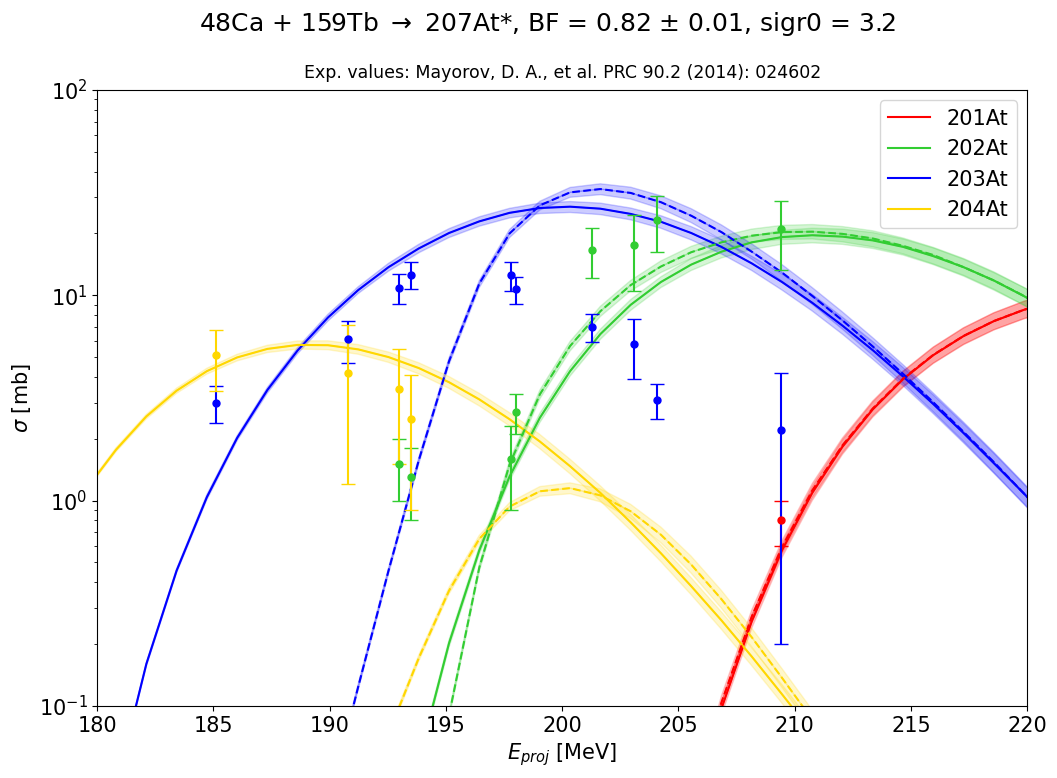

In [18]:
colors = ['red', 'limegreen', 'blue', 'gold', 'black', 'turquoise', 'magenta', 'grey', 'olive', 'brown']
sns.color_palette("dark")

plot_from = 3
plot_to = 3

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], palette=colors)
plt.semilogy()
plt.ylim(1e-1, 1e2)
plt.xlim(180, 220)
plt.suptitle(proj + ' + ' + trg + r' $\rightarrow$ ' + cn + '*, BF = ' + str(bf) + ' $\pm$ ' + str(bf_diff) + ', sigr0 = ' + str(sigr), va='top')
plt.title('Exp. values: Mayorov, D. A., et al. PRC 90.2 (2014): 024602', va='bottom', fontsize='small')
if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
plt.xlabel('$E_{proj}$ [MeV]')
plt.legend(loc='upper right')

sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], linestyle='--', legend=None, palette=colors)

## assymetric errors
# for i in range(len(exp)):
#     (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=[err_min[i], err_max[i]], marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
#     for cap in caps:
#         cap.set_markeredgewidth(1)

# symmetric errors
for i in range(len(exp)):
    (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=err[i], marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
    for cap in caps:
        cap.set_markeredgewidth(1)

# # no errors        
# for i in range(len(exp)):
#     (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=0, marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
#     for cap in caps:
#         cap.set_markeredgewidth(1)
        
alpha_value = 0.2
for i in range(plot_from+2, len(df10.columns)-plot_to):
    plt.fill_between(df10.iloc[:, 0],  df10.iloc[:, i], bf_low_10.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)
    plt.fill_between(df10.iloc[:, 0],  df10.iloc[:, i], bf_high_10.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)
    plt.fill_between(df0.iloc[:, 0],  df0.iloc[:, i], bf_low_0.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)
    plt.fill_between(df0.iloc[:, 0],  df0.iloc[:, i], bf_high_0.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)

plt.rcParams.update({'font.size': 15})

plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_barfac' + str(bf) + '_sigr' + str(sigr) + '_Mayorov.png')
plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_barfac' + str(bf) + '_sigr' + str(sigr) + '_Mayorov.pdf')